
## Part 1 - Questions

### Question 1: 

What is the average rent or price of houses in New York City, and when comparing prices across different boroughs, how do they vary?

* Who (population): Home buyers within New York City
* What (subject, discipline): Real estate, rent, and housing market
* Where (location): New York City
* When (snapshot, longitudinal): Snapshot
* How much data do you need to do the analysis/work: A dataset of 1,000 or so house sales in NYC over the course of the past year

### Question 2: 

What is the country with the highest percentage of people fully vaccinated?

* Who (population): All countries in the dataset
* What (subject, discipline): Public health, vaccination rates
* Where (location): Global
* When (snapshot, longitudinal): Snapshot
* How much data do you need to do the analysis/work: At least the total_vaccinations_fully and population columns of the dataset.

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

For the first question, Zillow has research called "Zillow Research" that provides datasets on houses sold in New York City and rent prices across different markets.
https://www.zillow.com/research/data/

For the second question, Kaggle has data containing comparisons over various countries and their vaccination data.
https://www.kaggle.com/datasets

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: Covid-19 World Vaccination Progress
2. Link to Data: https://www.kaggle.com/gpreda/covid-world-vaccination-progress
3. Source / Origin: 
	* Author or Creator: Gabriel Predo
	* Publication Date: 03/10/21 
	* Publisher: Kaggle
	* Version or Data Accessed: 02/16/23
4. License: CC BY-NC-SA 4.0
5. Can You Use this Data Set for Your Intended Use Case? Yes, this dataset could be used to investigate the global vaccination progress of COVID-19.

## Format




### Overview

* Format: csv
* Size: 324 KB
* Number of Records: 11338



### Sample of Data




In [8]:
# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
# with open('./data/raw/example-data.csv', 'r'): 

import csv

with open('../data/raw/country_vaccinations.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(reader):
        if i == 0:
            print(row)
        elif i < 5:
            print(row)
        else:
            break

['country', 'iso_code', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million', 'vaccines', 'source_name', 'source_website']
['Afghanistan', 'AFG', '2021-02-22', '0.0', '0.0', '', '', '', '0.0', '0.0', '', '', 'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing', 'World Health Organization', 'https://covid19.who.int/']
['Afghanistan', 'AFG', '2021-02-23', '', '', '', '', '1367.0', '', '', '', '34.0', 'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing', 'World Health Organization', 'https://covid19.who.int/']
['Afghanistan', 'AFG', '2021-02-24', '', '', '', '', '1367.0', '', '', '', '34.0', 'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing', 'World Health Organization', 'https://covid19.who.int/']
['Afghanistan', 'A


### Fields or Column Headers

* Field/Column 1: country (string)
* Field/Column 2: iso_code (string)
* Field/Column 3: date (string)
* Field/Column 4: total_vaccinations (integer)
* Field/Column 5: people_vaccinated (integer)
* Field/Column 6: people_fully_vaccinated (integer)
* Field/Column 7: daily_vaccinations_raw (integer)
* Field/Column 8: daily_vaccinations (integer)
* Field/Column 9: total_vaccinations_per_hundred (float)

## Part 3 - Extract / Transform

Describe your process for extracting, transforming, cleaning your incoming data:

So for this dataset, COVID-19 World Vaccination Progress, I will be using the columns listed below:

* "country": categorical data indicating the country where the vaccinations were administered
* "total_vaccinations": numeric data indicating the total number of doses of the vaccine that have been administered
* "total_vaccinations_per_hundred": numeric data indicating the percentage of the country's population that has received at least one dose of the vaccine
* I plan to convert the "total_vaccinations" and "total_vaccinations_per_hundred" columns into Python float types, and leave the "country" column as a string.

I will perform some cleaning on the dataset by normalizing the country names to ensure consistency. Additionally, I will check for missing values and replace them with a marker, such as None.


In [47]:
import csv

data = []
with open('../data/raw/country_vaccinations.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        country = row['country'].lower().strip()
        if country == "united states":
            country = "united states of america"
        elif country == "south korea":
            country = "korea, republic of"
        
        total_vaccinations = float(row['total_vaccinations']) if row['total_vaccinations'] != "" else None
        total_vaccinations_per_hundred = float(row['total_vaccinations_per_hundred']) if row['total_vaccinations_per_hundred'] != "" else None
        
        data.append({'country': country, 'total_vaccinations': total_vaccinations, 'total_vaccinations_per_hundred': total_vaccinations_per_hundred})

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [48]:
import csv

with open('../data/raw/country_vaccinations.csv') as file:
    reader = csv.DictReader(file)
    total_vaccinations = []
    for row in reader:
        vaccinations = row['total_vaccinations_per_hundred']
        if vaccinations:
            total_vaccinations.append(float(vaccinations))
    mean_vaccinations = sum(total_vaccinations) / len(total_vaccinations)
    print(f"CENTRAL TENDENCY:\nThe mean of total_vaccinations_per_hundred is {mean_vaccinations:.2f}!")

CENTRAL TENDENCY:
The mean of total_vaccinations_per_hundred is 80.19!


#### Dispersion

In [67]:
import csv
import math

with open('../data/raw/country_vaccinations.csv', newline='') as file:
    reader = csv.DictReader(file)
    values = [float(row['total_vaccinations_per_hundred']) for row in reader if row['total_vaccinations_per_hundred']]
    
mean = sum(values) / len(values)
std_dev = math.sqrt(sum((x - mean) ** 2 for x in values) / (len(values) - 1))

print(f"DISPERSON:\nThe standard deviation of total_vaccinations_per_hundred is {std_dev:.2f}!")

DISPERSON:
The standard deviation of total_vaccinations_per_hundred is 67.91!


###  Analysis on Categorical Data

#### Frequency

In [91]:
import csv
from collections import Counter

with open('../data/raw/country_vaccinations.csv', 'r') as file:
    reader = csv.DictReader(file)
    freq_counter = Counter()

    for row in reader:
        freq_counter[row['total_vaccinations_per_hundred']] += 1
        break

for value, count in freq_counter.items():
    print(f"{value}: {count}")

0.0: 1


#### Unique Values

In [94]:
import csv
with open('../data/raw/country_vaccinations.csv', 'r') as file:
    reader = csv.DictReader(file)
    unique_values = set()

    for row in reader:
        unique_values.add(row['total_vaccinations_per_hundred'])
        break

for value in unique_values:
    print(value)

0.0


## Part 5 - Visualizations



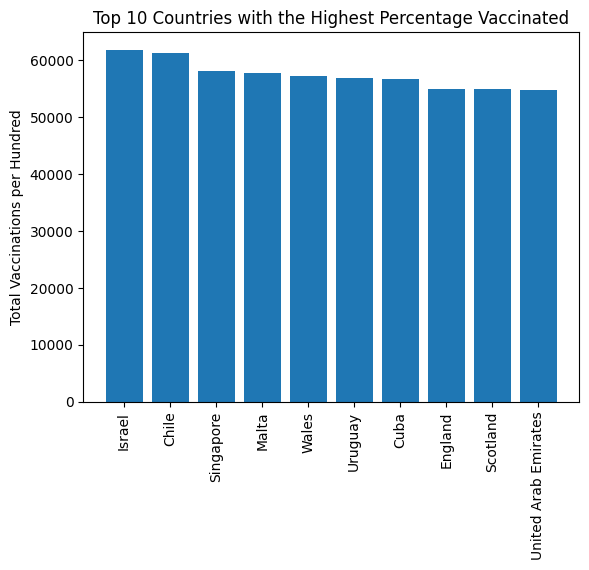

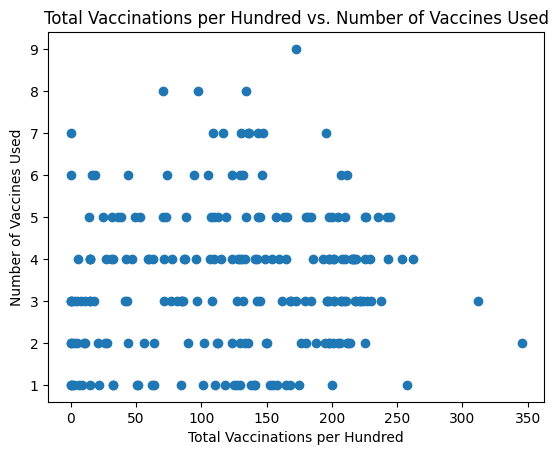

In [95]:
import csv
import matplotlib.pyplot as plt

with open('../data/raw/country_vaccinations.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = list(reader)

#creating a dictionary
vaccinations = {}
for row in data:
    country = row['country']
    total_vaccinations = float(row['total_vaccinations_per_hundred']) if row['total_vaccinations_per_hundred'] else 0
    if country not in vaccinations:
        vaccinations[country] = total_vaccinations
    else:
        vaccinations[country] += total_vaccinations

top_10 = sorted(vaccinations.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_countries = [x[0] for x in top_10]
top_10_vaccinations = [x[1] for x in top_10]

#bar chart
plt.bar(top_10_countries, top_10_vaccinations)
plt.title('Top 10 Countries with the Highest Percentage Vaccinated')
plt.ylabel('Total Vaccinations per Hundred')
plt.xticks(rotation=90)
plt.show()

#scatterplot
vaccine_data = {}
for row in data:
    country = row['country']
    total_vaccinations = float(row['total_vaccinations_per_hundred']) if row['total_vaccinations_per_hundred'] else 0
    num_vaccines = len(row['vaccines'].split(',')) if row['vaccines'] else 0
    vaccine_data[country] = (total_vaccinations, num_vaccines)

x = [v[0] for v in vaccine_data.values()]
y = [v[1] for v in vaccine_data.values()]

plt.scatter(x, y)
plt.title('Total Vaccinations per Hundred vs. Number of Vaccines Used')
plt.xlabel('Total Vaccinations per Hundred')
plt.ylabel('Number of Vaccines Used')
plt.show()

This portion of code written above reads the dataset, rearranges the data by country, and finds out the mean of total_vaccinations_per_hundred and the count of vaccines used for each country. I then wrote it to sort the data by total_vaccinations_per_hundred and select the top 10 countries for the bar chart. The bar chart shows the top 10 countries by percentage of population vaccinated.

The code also created a scatter plot of total_vaccinations_per_hundred vs vaccines used for each country. This scatter plot shows the relationship between the percentage of population vaccinated and the number of vaccines used for each country.

## Part 6 - Conclusion

Thoroughly going through the dataset definitely brought insight to my original question at hand. The dataset provided information on the total number of people vaccinated (per hundred, of course) in each country. This was used for finding what country actually had the highest percentage of people vaccinated.

The question's solution was easily determined by sorting the dataset by the total_vaccinations_per_hundred column and then select the top row(s) depending on the number of countries considered.

Finding the mean gave me a general idea of the average percentage of vaccinated people across all countries globally. Furthermore, the standard deviation revealed how the data varied around the mean.

(If my code worked!!!!) I would be able to find the outliers in the dataset by calculating the range, difference between max and min values. 

The analysis of the dataset I chose provided me valuable insight about Covid-19 vaccination progress globally and how each country varies with the percentage of people vaccinated. It helped me gain a better understanding of the overall distribution of vaccination rates around the world.


## Part 7 - Heights and Weights




Correlation coefficient: 0.7604621859407162


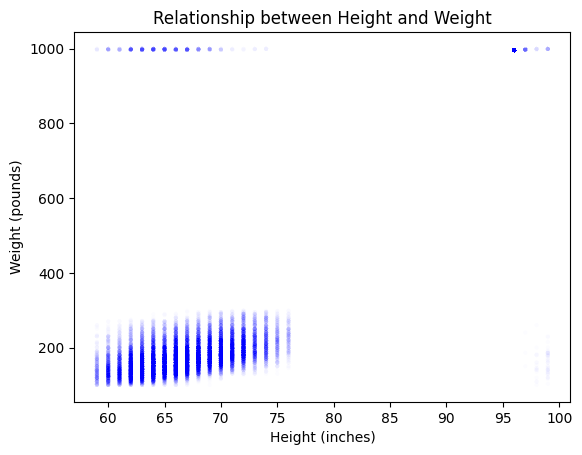

In [101]:
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('../data/raw/adult19.csv', 'r') as f:
    reader = csv.DictReader(f)
    heights = []
    weights = []
    for row in reader:
        height = row['HEIGHTTC_A']
        weight = row['WEIGHTLBTC_A']
        if height != '.' and weight != '.':
            heights.append(int(height))
            weights.append(int(weight))

corr_coef = np.corrcoef(heights, weights)[0, 1]
print("Correlation coefficient:", corr_coef)

jitter = 0.4
plt.scatter(heights, weights, alpha=0.01, s=10, c='blue', edgecolors='none')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Relationship between Height and Weight')
plt.show()